# Agglomerative Clustering

Agglomerative clustering was chosen due to its advantage of determining the linkage distance instead of specifying the number of clusters. The data was scaled and various linkage methods were explored. After selecting the most suitable linkage method, the distance threshold was adjusted to form the most optimal clusters.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering

In [2]:
#Styles setup
#Colors
background = '#F0F0F0'
red = '#ED462F'
pink = '#F1BBB8'
green = '#4CB866'
blue = '#003D83'
black = '#333333'
grey = '#D0D9DC'
white = 'white'

#Matplotlib styling
plt.rcParams['axes.facecolor'] = grey
plt.rcParams['figure.facecolor'] = background
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['xtick.color'] = background
plt.rcParams['ytick.color'] = background
plt.rcParams['xtick.labelcolor'] = '#8C9496'
plt.rcParams['ytick.labelcolor'] = '#8C9496'
plt.rcParams['legend.labelcolor'] = '#8C9496'
plt.rcParams['legend.frameon'] = False
plt.rcParams['grid.color'] = background
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.axisbelow'] = True

## 1. Data preparation

The full preprocessed data was imported omitting the date and the shID column, as they are both irrelevant for the clustering process. The date has no quantative value, while the shID column contains estimated values from the patient, which may not be accurate. Additionally, the values in the sport column were converted to strings in order to perform data transformation into dummy variables. In order to normalize the data, the MinMaxScaler() was used since some of the data contained negative values. 

In [3]:
df = pd.read_csv('FullData_preprocessed.csv')
df = df.drop(['Date','shID'], axis=1)
df['Sport'] = df['Sport'].astype(str)
df

,Interval,bID,BG1,BG2,DV,SC,Sport,Temp,Humid,Y-shID
0,lunch-dinner,0.0,3.9,5.6,1.216,1473.0,False,-11.600000,54.030000,3.931915
1,dinner-breakfast,0.0,5.6,6.2,1.172,7649.0,False,-12.087879,52.386667,2.638298
2,breakfast-lunch,0.0,4.6,4.9,0.574,38.0,False,-18.900000,71.030000,3.648936
3,lunch-dinner,0.0,4.9,4.4,0.784,2516.0,False,-14.100000,56.385000,3.276596
4,dinner-breakfast,2.0,4.4,5.7,0.868,4627.0,False,-11.857143,54.900714,3.031915
...,...,...,...,...,...,...,...,...,...,...
385,breakfast-lunch,0.0,5.3,4.4,0.769,0.0,False,5.066667,85.370000,2.808511
386,dinner-breakfast,1.0,4.0,6.1,0.812,11.0,False,11.450000,51.975000,3.893617
387,lunch-dinner,0.0,5.0,3.7,0.900,5924.0,False,10.800000,58.256667,2.361702
388,dinner-breakfast,0.0,3.7,4.8,0.366,0.0,False,9.100000,59.300000,3.063830


In [4]:
X = pd.get_dummies(df)
X

,bID,BG1,BG2,DV,SC,Temp,Humid,Y-shID,Interval_breakfast-lunch,Interval_dinner-breakfast,Interval_lunch-dinner,Sport_False,Sport_True
0,0.0,3.9,5.6,1.216,1473.0,-11.600000,54.030000,3.931915,0,0,1,1,0
1,0.0,5.6,6.2,1.172,7649.0,-12.087879,52.386667,2.638298,0,1,0,1,0
2,0.0,4.6,4.9,0.574,38.0,-18.900000,71.030000,3.648936,1,0,0,1,0
3,0.0,4.9,4.4,0.784,2516.0,-14.100000,56.385000,3.276596,0,0,1,1,0
4,2.0,4.4,5.7,0.868,4627.0,-11.857143,54.900714,3.031915,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,0.0,5.3,4.4,0.769,0.0,5.066667,85.370000,2.808511,1,0,0,1,0
386,1.0,4.0,6.1,0.812,11.0,11.450000,51.975000,3.893617,0,1,0,1,0
387,0.0,5.0,3.7,0.900,5924.0,10.800000,58.256667,2.361702,0,0,1,1,0
388,0.0,3.7,4.8,0.366,0.0,9.100000,59.300000,3.063830,0,1,0,1,0


In [5]:
scaler = MinMaxScaler()

In [6]:
scaled_X = scaler.fit_transform(X)

In [7]:
scaled_X 

array([[0.        , 0.19607843, 0.40277778, ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.52941176, 0.48611111, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.33333333, 0.30555556, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.41176471, 0.13888889, ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.15686275, 0.29166667, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.66666667, 0.27777778, ..., 0.        , 1.        ,
        0.        ]])

## 2. Choosing linkage method

At first, the algorithm was run using the default linkage method 'ward' with a random distance threshold of 0.1, resulting in a large number of clusters. To obtain a more manageable number of clusters, the threshold was adjusted until approximately 10 clusters were achieved. This process was repeated for the remaining three linkage types (single, average, and complete). The performance of the three linkage methods was then visualized to gain an understanding of how well the methods distributed the clusters among the three intervals (breakfast-lunch, lunch-dinner, dinner-breakfast).

### Default settings

In [31]:
model_1 = AgglomerativeClustering(n_clusters=None,linkage='ward',distance_threshold=0.1)

In [32]:
cluster_labels_1 = model_1.fit_predict(scaled_X)

In [33]:
df['1'] = cluster_labels_1

In [66]:
len(df['1'].unique())

385

### Ward linkage

In [155]:
model_2 = AgglomerativeClustering(n_clusters=None,linkage='ward',distance_threshold=3)

In [156]:
cluster_labels_2 = model_2.fit_predict(scaled_X)

In [157]:
df['2'] = cluster_labels_2

In [158]:
len(df['2'].unique())

9

### Single linkage

In [187]:
model_3 = AgglomerativeClustering(n_clusters=None,linkage='single',distance_threshold=0.55)

In [188]:
cluster_labels_3 = model_3.fit_predict(scaled_X)

In [189]:
df['3'] = cluster_labels_3

In [190]:
len(df['3'].unique())

10

### Average linkage

In [199]:
model_4 = AgglomerativeClustering(n_clusters=None,linkage='average',distance_threshold=0.9)

In [200]:
cluster_labels_4 = model_4.fit_predict(scaled_X)

In [201]:
df['4'] = cluster_labels_4

In [202]:
len(df['4'].unique())

10

### Complete linkage

In [223]:
model_5 = AgglomerativeClustering(n_clusters=None,linkage='complete',distance_threshold=1.4)

In [224]:
cluster_labels_5 = model_5.fit_predict(scaled_X)

In [225]:
df['5'] = cluster_labels_5

In [226]:
len(df['5'].unique())

10

### Visualisation

In [234]:
#data frames for each interval
df_BL = df[df['Interval']=='breakfast-lunch']
df_LD = df[df['Interval']=='lunch-dinner']
df_DB = df[df['Interval']=='dinner-breakfast']

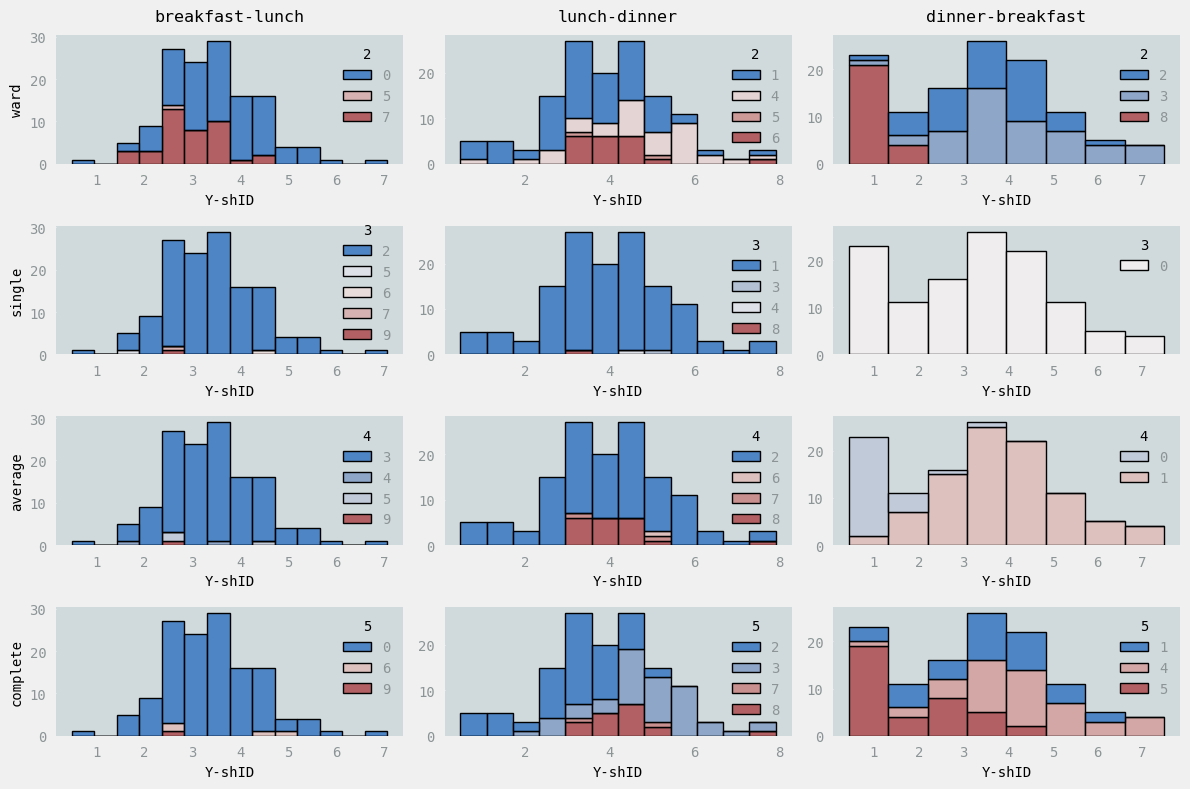

In [428]:
#all types of linkage were visualised and Y-shID feature was taken as an example
fig,axes = plt.subplots(ncols=3,nrows=4,figsize=(12,8))

sns.histplot(data=df_BL,x='Y-shID',hue='2',ax=axes[0,0],palette='vlag',multiple='stack',)
axes[0,0].set_title('breakfast-lunch',pad=10)
axes[0,0].set_ylabel('ward')
sns.histplot(data=df_LD,x='Y-shID',hue='2',ax=axes[0,1],palette='vlag',multiple='stack')
axes[0,1].set_title('lunch-dinner',pad=10)
axes[0,1].set_ylabel('')
sns.histplot(data=df_DB,x='Y-shID',hue='2',ax=axes[0,2],palette='vlag',multiple='stack')
axes[0,2].set_title('dinner-breakfast',pad=10)
axes[0,2].set_ylabel('')

sns.histplot(data=df_BL,x='Y-shID',hue='3',ax=axes[1,0],palette='vlag',multiple='stack')
axes[1,0].set_ylabel('single')
sns.histplot(data=df_LD,x='Y-shID',hue='3',ax=axes[1,1],palette='vlag',multiple='stack')
axes[1,1].set_ylabel('')
sns.histplot(data=df_DB,x='Y-shID',hue='3',ax=axes[1,2],palette='vlag',multiple='stack')
axes[1,2].set_ylabel('')

sns.histplot(data=df_BL,x='Y-shID',hue='4',ax=axes[2,0],palette='vlag',multiple='stack')
axes[2,0].set_ylabel('average')
sns.histplot(data=df_LD,x='Y-shID',hue='4',ax=axes[2,1],palette='vlag',multiple='stack')
axes[2,1].set_ylabel('')
sns.histplot(data=df_DB,x='Y-shID',hue='4',ax=axes[2,2],palette='vlag',multiple='stack')
axes[2,2].set_ylabel('')

sns.histplot(data=df_BL,x='Y-shID',hue='5',ax=axes[3,0],palette='vlag',multiple='stack')
axes[3,0].set_ylabel('complete')
sns.histplot(data=df_LD,x='Y-shID',hue='5',ax=axes[3,1],palette='vlag',multiple='stack')
axes[3,1].set_ylabel('')
sns.histplot(data=df_DB,x='Y-shID',hue='5',ax=axes[3,2],palette='vlag',multiple='stack')
axes[3,2].set_ylabel('')

plt.tight_layout();

The graphs show that single, average and complete linkage distribute the data unevenly, but the clusters are distinct between meal intervals. The distribution using ward linkage is more even, but cluster 5 is present in both the 'breakfast-lunch' and 'lunch-dinner' intervals. To gain further insight, cluster 5 was further investigated.

In [245]:
df[df['2']==5]

,Interval,bID,BG1,BG2,DV,SC,Sport,Temp,Humid,Y-shID,1,2,3,4,5
38,lunch-dinner,0.0,5.4,3.7,3.07,279.0,True,5.750000,29.397500,3.148936,249,5,8,7,7
128,breakfast-lunch,0.0,4.7,4.3,0.62,908.0,True,12.333333,42.776667,2.744681,183,5,7,9,9
167,lunch-dinner,0.0,5.5,6.0,2.18,38.0,True,18.850000,41.885000,5.106383,189,5,3,7,7


Upon further investigation, it was evident that Cluster 5 was generated by data where the Sport parameter was set to True (only 3 rows in the entire dataset). Considering the value of this data, Ward Linkage Method was selected as the best clustering technique.

## 3. Ward linkage further hypoparameters tuning

The distance threshold was adjusted until the optimal cluster size was achieved, ensuring that clusters did not exceed 8 rows to reduce the risk of overfitting for subsequent predictive algorithms.

In [397]:
model_6 = AgglomerativeClustering(n_clusters=None,linkage='ward',distance_threshold=0.6)

In [398]:
cluster_labels_6 = model_6.fit_predict(scaled_X)

In [399]:
df['6'] = cluster_labels_6

In [400]:
len(df['6'].unique())

112

In [401]:
df_count = df.groupby('6').count()
df_count

,Interval,bID,BG1,BG2,DV,SC,Sport,Temp,Humid,Y-shID,1,2,3,4,5
6,,,,,,,,,,,,,,,
0,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
3,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
4,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
108,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
109,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


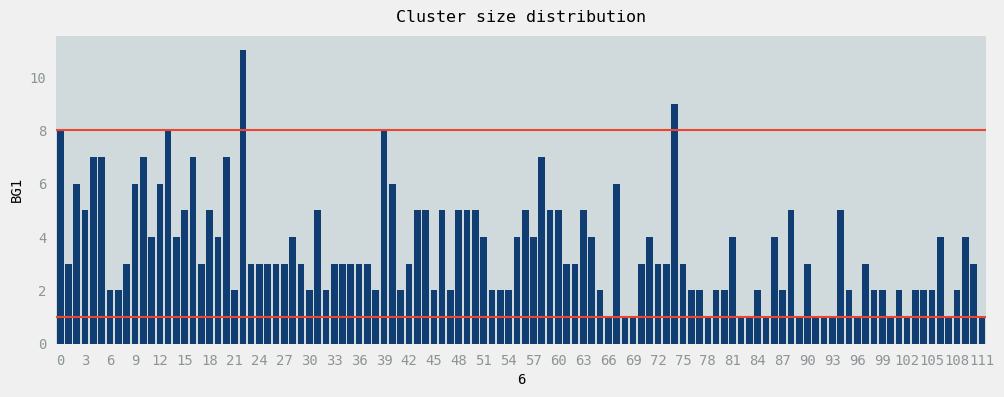

In [409]:
plt.figure(figsize=(12,4))
plt.title('Cluster size distribution',pad=10)
sns.barplot(data=df_count,x=df_count.index,y='BG1',color=blue)
plt.xticks(np.arange(0,112,3),np.arange(0,112,3))
plt.axhline(y=1,color=red)
plt.axhline(y=8,color=red);

In [410]:
df_count[df_count['BG1']>8]

,Interval,bID,BG1,BG2,DV,SC,Sport,Temp,Humid,Y-shID,1,2,3,4,5
6,,,,,,,,,,,,,,,
22,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
74,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


In [411]:
df[df['6']==22]

,Interval,bID,BG1,BG2,DV,SC,Sport,Temp,Humid,Y-shID,1,2,3,4,5,6
147,breakfast-lunch,0.0,4.8,4.6,0.734,0.0,False,4.804000,71.067200,2.936170,380,7,2,3,0,22
155,breakfast-lunch,0.0,4.7,3.5,0.618,0.0,False,6.666667,64.133333,2.978723,374,7,2,3,0,22
179,breakfast-lunch,0.0,4.5,4.1,1.140,0.0,False,15.000000,74.530000,2.617021,347,7,2,3,0,22
183,breakfast-lunch,0.0,4.4,4.1,0.590,0.0,False,19.000000,53.880000,1.744681,111,7,2,3,0,22
191,breakfast-lunch,0.0,4.8,4.1,0.730,8.0,False,11.000000,71.280000,2.617021,240,7,2,3,0,22
196,breakfast-lunch,0.0,4.6,3.0,0.690,0.0,False,14.000000,74.345000,1.914894,298,7,2,3,0,22
208,breakfast-lunch,0.0,4.2,3.7,0.710,10.0,False,12.666667,95.766667,1.574468,119,7,2,3,0,22
214,breakfast-lunch,0.0,4.8,3.5,0.699,0.0,False,12.525000,84.887500,2.978723,184,7,2,3,0,22
227,breakfast-lunch,0.0,5.1,5.4,0.384,0.0,False,25.000000,65.105000,3.446809,127,7,2,3,0,22
265,breakfast-lunch,0.0,4.6,4.2,0.701,0.0,False,13.000000,76.375000,3.574468,225,7,2,3,0,22


In [412]:
df[df['6']==74]

,Interval,bID,BG1,BG2,DV,SC,Sport,Temp,Humid,Y-shID,1,2,3,4,5,6
168,breakfast-lunch,0.0,4.6,5.7,0.850,0.0,False,11.750000,99.875000,3.638298,376,7,2,3,0,74
205,breakfast-lunch,0.0,4.1,5.6,0.610,38.0,False,16.500000,77.390000,2.382979,284,7,2,3,0,74
218,breakfast-lunch,0.0,4.1,5.6,0.632,2505.0,False,24.000000,88.600000,2.382979,221,7,2,3,0,74
221,breakfast-lunch,0.0,3.9,4.9,0.488,0.0,False,18.500000,99.980000,3.127660,191,7,2,3,0,74
240,breakfast-lunch,0.0,4.8,5.1,0.548,0.0,False,17.000000,99.990000,3.255319,1,7,2,3,0,74
247,breakfast-lunch,0.0,4.6,4.9,0.557,47.0,False,14.900000,94.180000,3.127660,1,7,2,3,0,74
255,breakfast-lunch,0.0,4.2,5.2,0.550,0.0,False,17.950000,93.885000,3.319149,169,7,2,3,0,74
257,breakfast-lunch,0.0,3.9,6.3,0.554,0.0,False,17.933333,93.883333,4.021277,289,7,2,3,0,74
271,breakfast-lunch,0.0,4.8,5.6,0.542,0.0,False,10.300000,89.380000,3.574468,48,7,2,3,0,74


### Conclusion

The distance threshold was set to 0.6, resulting in 112 clusters, with two clusters containing more than 8 rows. This was a suitable compromise between having too many clusters with only 1 row and too few clusters with too many rows. In the future app, it would make sense to set a warning when the resulting cluster is too large, informing users that the prediction may not be accurate due to the high number of data points. 